In [1]:
import numpy as np
import keras
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

In [3]:
num_classes = 12

input_shape = (256, 256, 1)

In [15]:
x = []
y = []

breeds = []

for _, dirs, _ in os.walk('photos'):
    for i, breed in enumerate(dirs):
        print(breed, i)
        breeds.append(breed)
        
        for _, _, files in os.walk('photos/' + breed):
            for file in files:
                img = cv2.imread('photos/' + breed + '/' + file, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, dsize=input_shape[:2], interpolation=cv2.INTER_CUBIC)
                x.append(img)
                y.append(i)

x = np.asarray(x)
y = np.asarray(y)

Sphynx 0
Birman 1
Egyptian Mau 2
Ragdoll 3
Abyssinian 4
Siamese 5
Maine Coon 6
Bengal 7
British Shorthair 8
Bombay 9
Russian Blue 10
Persian 11


In [5]:
x = x.astype('float32') / 255
x = np.expand_dims(x, -1)

y = keras.utils.to_categorical(y, num_classes)

In [6]:
i = np.random.permutation(x.shape[0])
x = x[i]
y = y[i]

x_train, x_test = x[:2000,:], x[2000:,:]
y_train, y_test = y[:2000,:], y[2000:,:]

In [7]:
model = Sequential(
    [
        Input(shape=input_shape),
        Conv2D(32, kernel_size=(5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dropout(0.5),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dropout (Dropout)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 16)                3

In [8]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.load_weights('save_at_50.h5')

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.8005993366241455
Test accuracy: 0.7855297327041626


Persian


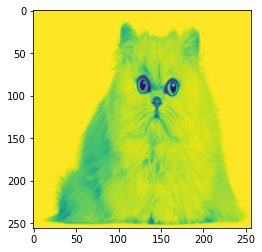

In [22]:
breed = 'Abyssinian'
num = '4'

#img = cv2.imread('photos/' + breed + '/' + breed + '_' + num + '.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('photos/Test/Persian.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, dsize=input_shape[:2], interpolation=cv2.INTER_CUBIC)
x = img.astype('float32') / 255
x = np.expand_dims(x, -1)
x = np.expand_dims(x, 0)
h = np.argmax(model.predict(x))

print(breeds[h])
plt.imshow(img)